# Machine Learning Models Comparation for Phishing Detection
By Aurellia Gita Elysia

In this project, we will use phishing cyberattack datasets to compare metrics for 3 ML models:
* Support Vector Machine (SVM)
* Random Forests
* Naive Bayes

## 1. Import Libraries

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 2. Import Datasets
We use 3 email and website phishing datasets:
* Dataset Phishing Domain Detection
* Phishing Dataset for Machine Learning
* Web Page Phishing Detection Dataset

In [8]:
# Define file paths for datasets (local path)
file_path1 = 'dataset/phishing_cs.csv'
file_path2 = 'dataset/phishing_ml.csv'
file_path3 = 'dataset/phishing_web.csv'

# Initialize datasets
datasets = {}

# Load datasets if files exist
for i, file_path in enumerate([file_path1, file_path2, file_path3], start=1):
    if os.path.exists(file_path):
        datasets[f'dataset_{i}'] = pd.read_csv(file_path)
        print(f"Dataset {i} loaded successfully.")
    else:
        print(f"Error: File not found at {file_path}")
        # List the files in the directory if not found
        dir_name = os.path.dirname(file_path)
        print(f"Files in the directory: {os.listdir(dir_name)}")

# Access datasets
df_cs = datasets.get('dataset_1')  # Dataset Phishing Domain Detection
df_ml = datasets.get('dataset_2')  # Phishing Dataset for Machine Learning
df_web = datasets.get('dataset_3')  # Web Page Phishing Detection Dataset

# Example: Print the first few rows of each dataset
if df_cs is not None:
    print("Dataset Phishing Domain Detection:")
    print(df_cs.head())
if df_ml is not None:
    print("Phishing Dataset for Machine Learning:")
    print(df_ml.head())
if df_web is not None:
    print("Web Page Phishing Detection Dataset:")
    print(df_web.head())

Dataset 1 loaded successfully.
Dataset 2 loaded successfully.
Dataset 3 loaded successfully.
Dataset Phishing Domain Detection:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            1               0                  0              1   
1            2               5                  4              2   
2            2               0                  0              0   
3            1               1                  0              2   
4            2               1                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved 

## 3. Data Preprocessing
### 3.1 Dataset Phishing Domain Detection

In [9]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB


In [10]:
# Duplicate rows
print("Total rows of duplicates in the dataset: ", df_cs.duplicated().sum())


Total rows of duplicates in the dataset:  42489


> #### **💡 Explanation:**  
> There are a total of 42.489 rows with duplicate values. We handle these by dropping only the duplicates.

In [11]:
# Drop duplicate rows
df_cs = df_cs.drop_duplicates()

# Verify Changes
print("Total rows of duplicates in the dataset: ", df_cs.duplicated().sum())

Total rows of duplicates in the dataset:  0


In [12]:
# Missing Values
print("Missing values in the dataset:" )
print(df_cs.isnull().values.any())
print(df_cs.isnull().sum())

Missing values in the dataset:
False
qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


> #### **💡 Explanation:**  
> There are no missing values in this dataset. Which means that the data preprocessing for this dataset is finished.

### 3.2 Phishing Dataset for Machine Learning

In [13]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [14]:
# Duplicate rows
print("Total rows of duplicates in the dataset: ", df_ml.duplicated().sum())

Total rows of duplicates in the dataset:  0


> #### **💡 Explanation:**  
> There are no duplicate rows in this dataset. We can proceed to the next step of data preprocessing.

In [15]:
# Missing Values
print("Missing values in the dataset:" )
print(df_ml.isnull().sum())

Missing values in the dataset:
id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSla

> #### **💡 Explanation:**  
> There are no missing values in this dataset. Which means that the data preprocessing for this dataset is finished.

### 3.3 Web Page Phishing Detection Dataset

In [16]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [17]:
# Duplicate rows
print("Total rows of duplicates in the dataset: ", df_web.duplicated().sum())

Total rows of duplicates in the dataset:  0


> #### **💡 Explanation:**  
> There are no duplicate rows in this dataset. We can proceed to the next step of data preprocessing.

In [18]:
# Missing Values
print("Missing values in the dataset:" )
print(df_web.isnull().values.any())
print(df_web.isnull().sum())

Missing values in the dataset:
False
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


> #### **💡 Explanation:**  
> There are no missing values in this dataset. Which means that the data preprocessing for this dataset is finished.

## 4. Split Train & Test Sets
### 4.1 Dataset Phishing Domain Detection

In [19]:
cs_X = df_cs.drop(columns=['phishing'])
cs_y = df_cs['phishing'] 

cs_X_train, cs_X_test, cs_y_train, cs_y_test = train_test_split(
    cs_X, cs_y, test_size=0.2, random_state=42, stratify=cs_y
)

print("Split successful")

Split successful


### 4.2 Phishing Dataset for Machine Learning

In [20]:
ml_X = df_ml.drop(columns=['CLASS_LABEL'])
ml_y = df_ml['CLASS_LABEL'] 

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(
    ml_X, ml_y, test_size=0.2, random_state=42, stratify=ml_y
)

print("Split successful")

Split successful


### 4.3 Web Page Phishing Detection Dataset

In [21]:
web_X = df_web.drop(columns=['status'])
web_y = df_web['status'] 

web_X_train, web_X_test, web_y_train, web_y_test = train_test_split(
    web_X, web_y, test_size=0.2, random_state=42, stratify=web_y
)

print("Split successful")

Split successful


## 5. EDA

### 5.1 Dataset Phishing Domain Detection

In [22]:
df_cs.describe()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  87209.000000    87209.000000       87209.000000   87209.000000   
mean       2.194189        0.331514           0.115252       1.292688   
std        1.239118        1.126436           0.661569       1.896041   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          87209.000000   87209.000000  87209.000000  87209.000000   
mean               0.009082       0.206768      0.022383      0.141912   
std                0.111737       0.958605      0.281739      0.929997   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                9.000000      23.000000     43.000000     26.000000   

       qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  \
count         87209.000000   87209.000000  ...     87209.000000   
mean              0.002993       0.001032  ...         1.169742   
std               0.088057       0.073249  ...         0.861314   
min               0.000000       0.000000  ...        -1.000000   
25%               0.000000       0.000000  ...         1.000000   
50%               0.000000       0.000000  ...         1.000000   
75%               0.000000       0.000000  ...         1.000000   
max              10.000000       9.000000  ...        24.000000   

       qty_nameservers  qty_mx_servers   ttl_hostname  tls_ssl_certificate  \
count     87209.000000    87209.000000   87209.000000         87209.000000   
mean          2.764153        1.767696    6260.446273             0.514740   
std           1.320729        1.706354   11532.219887             0.499786   
min           0.000000        0.000000      -1.000000             0.000000   
25%           2.000000        1.000000     293.000000             0.000000   
50%           2.000000        1.000000    2537.000000             1.000000   
75%           4.000000        2.000000   10987.000000             1.000000   
max          20.000000       20.000000  604800.000000             1.000000   

       qty_redirects  url_google_index  domain_google_index  url_shortened  \
count    87209.00000      87209.000000         87209.000000   87209.000000   
mean         0.36604          0.001640             0.002259       0.005573   
std          0.77095          0.056131             0.061005       0.074443   
min         -1.00000         -1.000000            -1.000000       0.000000   
25%          0.00000          0.000000             0.000000       0.000000   
50%          0.00000          0.000000             0.000000       0.000000   
75%          1.00000          0.000000             0.000000       0.000000   
max         17.00000          1.000000             1.000000       1.000000   

           phishing  
count  87209.000000  
mean       0.349700  
std        0.476878  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 112 columns]

#### 5.2.1 Check for Balanced/Imbalanced Data

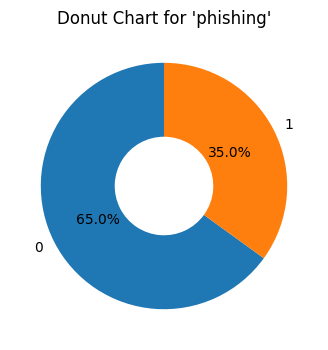

In [23]:
# Check for imbalanced labels
chart_cs = df_cs['phishing'].value_counts()

plt.figure(figsize=(4, 4))  # Adjust the size as needed
plt.pie(chart_cs, labels=chart_cs.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.6})
plt.title("Donut Chart for 'phishing'")

plt.show()

> #### **💡 Explanation:**  
> Based on the chart above, there is an imbalance between the phishing and legitimate data. If we leave it, this might affect the quality of our model and gave it bias, so we have to handle it to balance the data.
>
> In order to balance it, we will assign class weights

In [24]:
cs_class = np.unique(cs_y_train)
cs_class_weights = compute_class_weight('balanced', classes=cs_class, y=cs_y_train)
cs_class_weights_dict = dict(zip(cs_class, cs_class_weights))

print("Class Weights:", cs_class_weights_dict)

Class Weights: {np.int64(0): np.float64(0.7688840397628337), np.int64(1): np.float64(1.4297688335109435)}


> #### **💡 Explanation:**  
> By assigning class weights, it will give more importance to the minority class (phishing data), rather than the majority class (legitimate data) during the model training. This is useful due to the imbalance of phishing and legitimate data, so that the model won't overlook the minority class despite the lower number of rows within.

#### 5.1.2 Correlation Matrix

In [25]:
def corr_matrix_cs(data, idx_s, idx_e):
    # Extract the 'status' column
    y = data['phishing']
    
    # Subset the data from idx_s to idx_e and add 'status' column
    temp = data.iloc[:, idx_s:idx_e]
    temp['phishing'] = y  # Add the 'status' column to the subset
    plt.figure(figsize=(20, 20)) 
    
    # Generate heatmap of correlation between the 10 columns and 'status'
    sns.heatmap(temp.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
    plt.title("Correlation with 'Phishing' Column")
    plt.show()

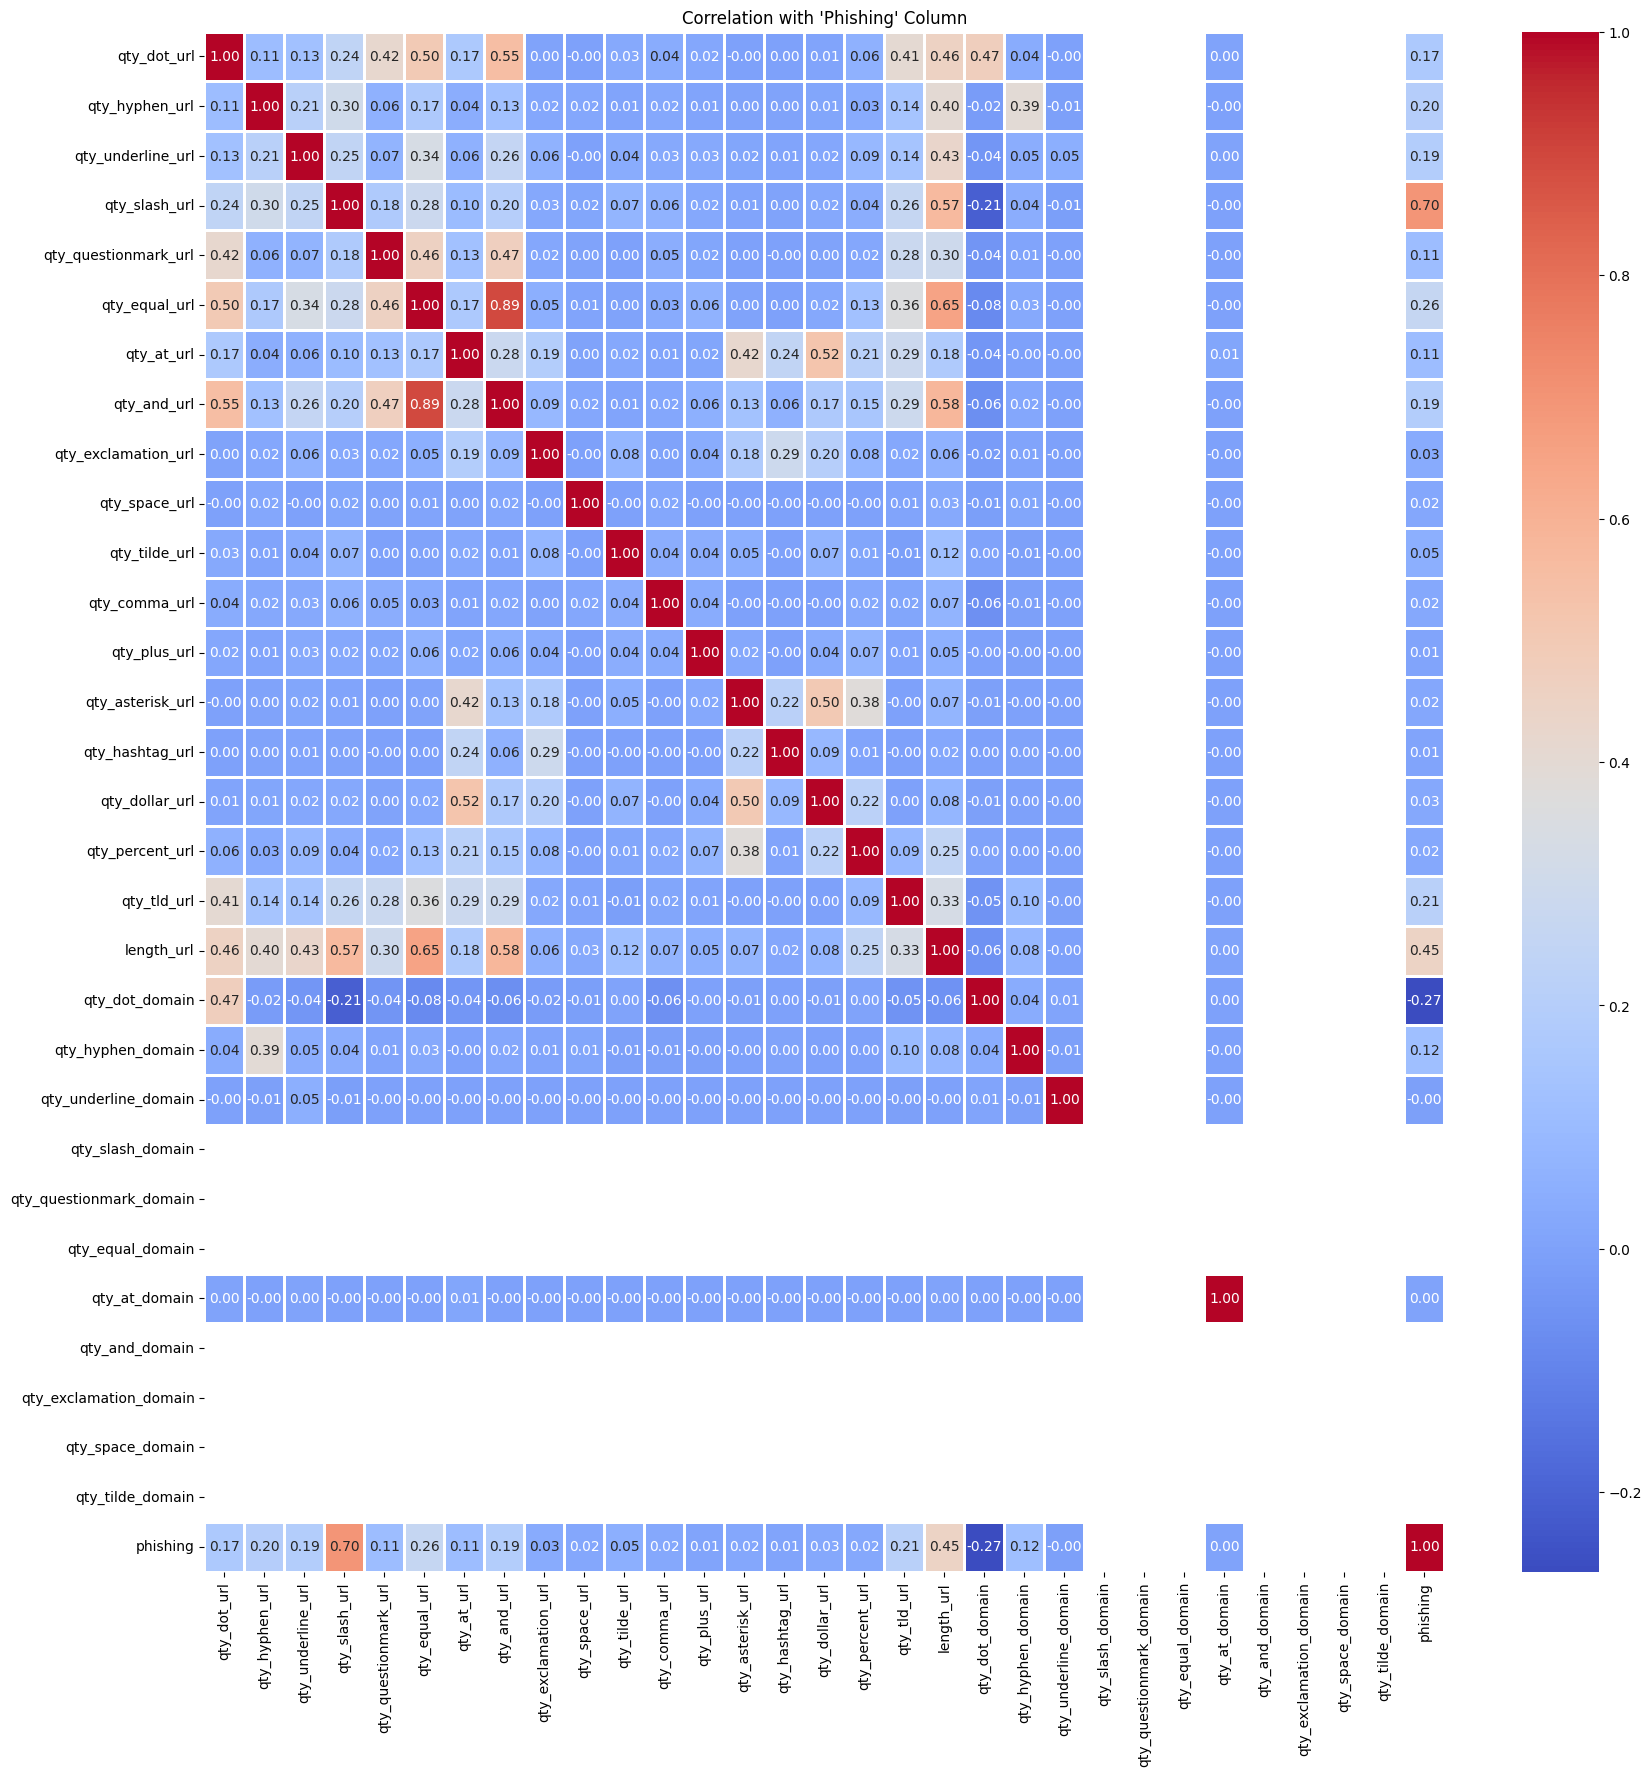

In [26]:
corr_matrix_cs(df_cs, 0, 30)

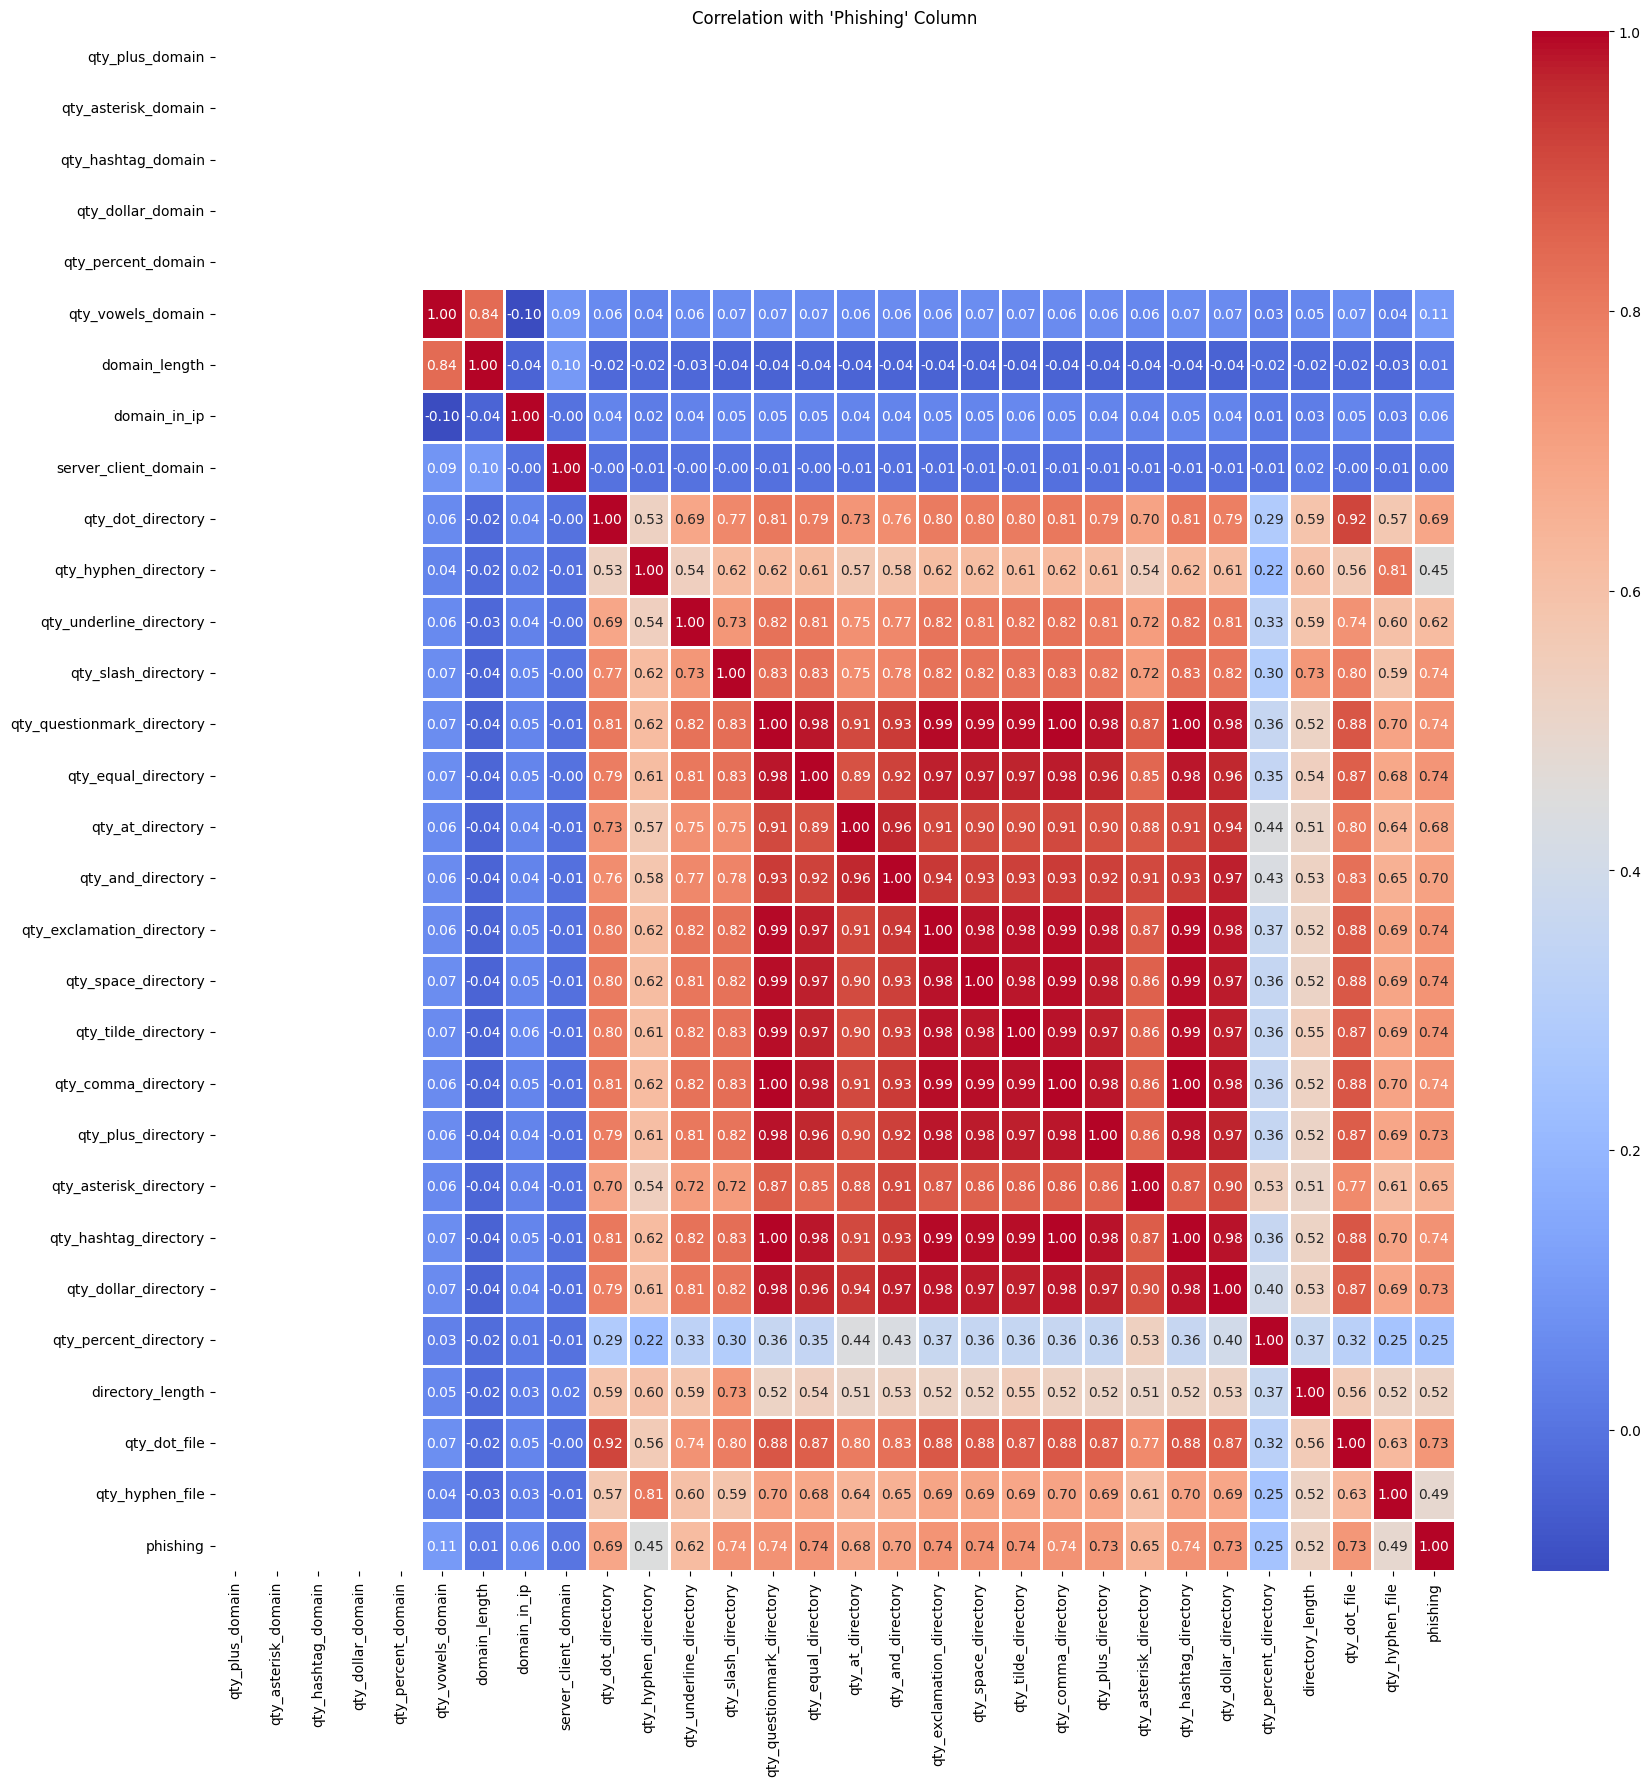

In [27]:
corr_matrix_cs(df_cs, 31, 60)

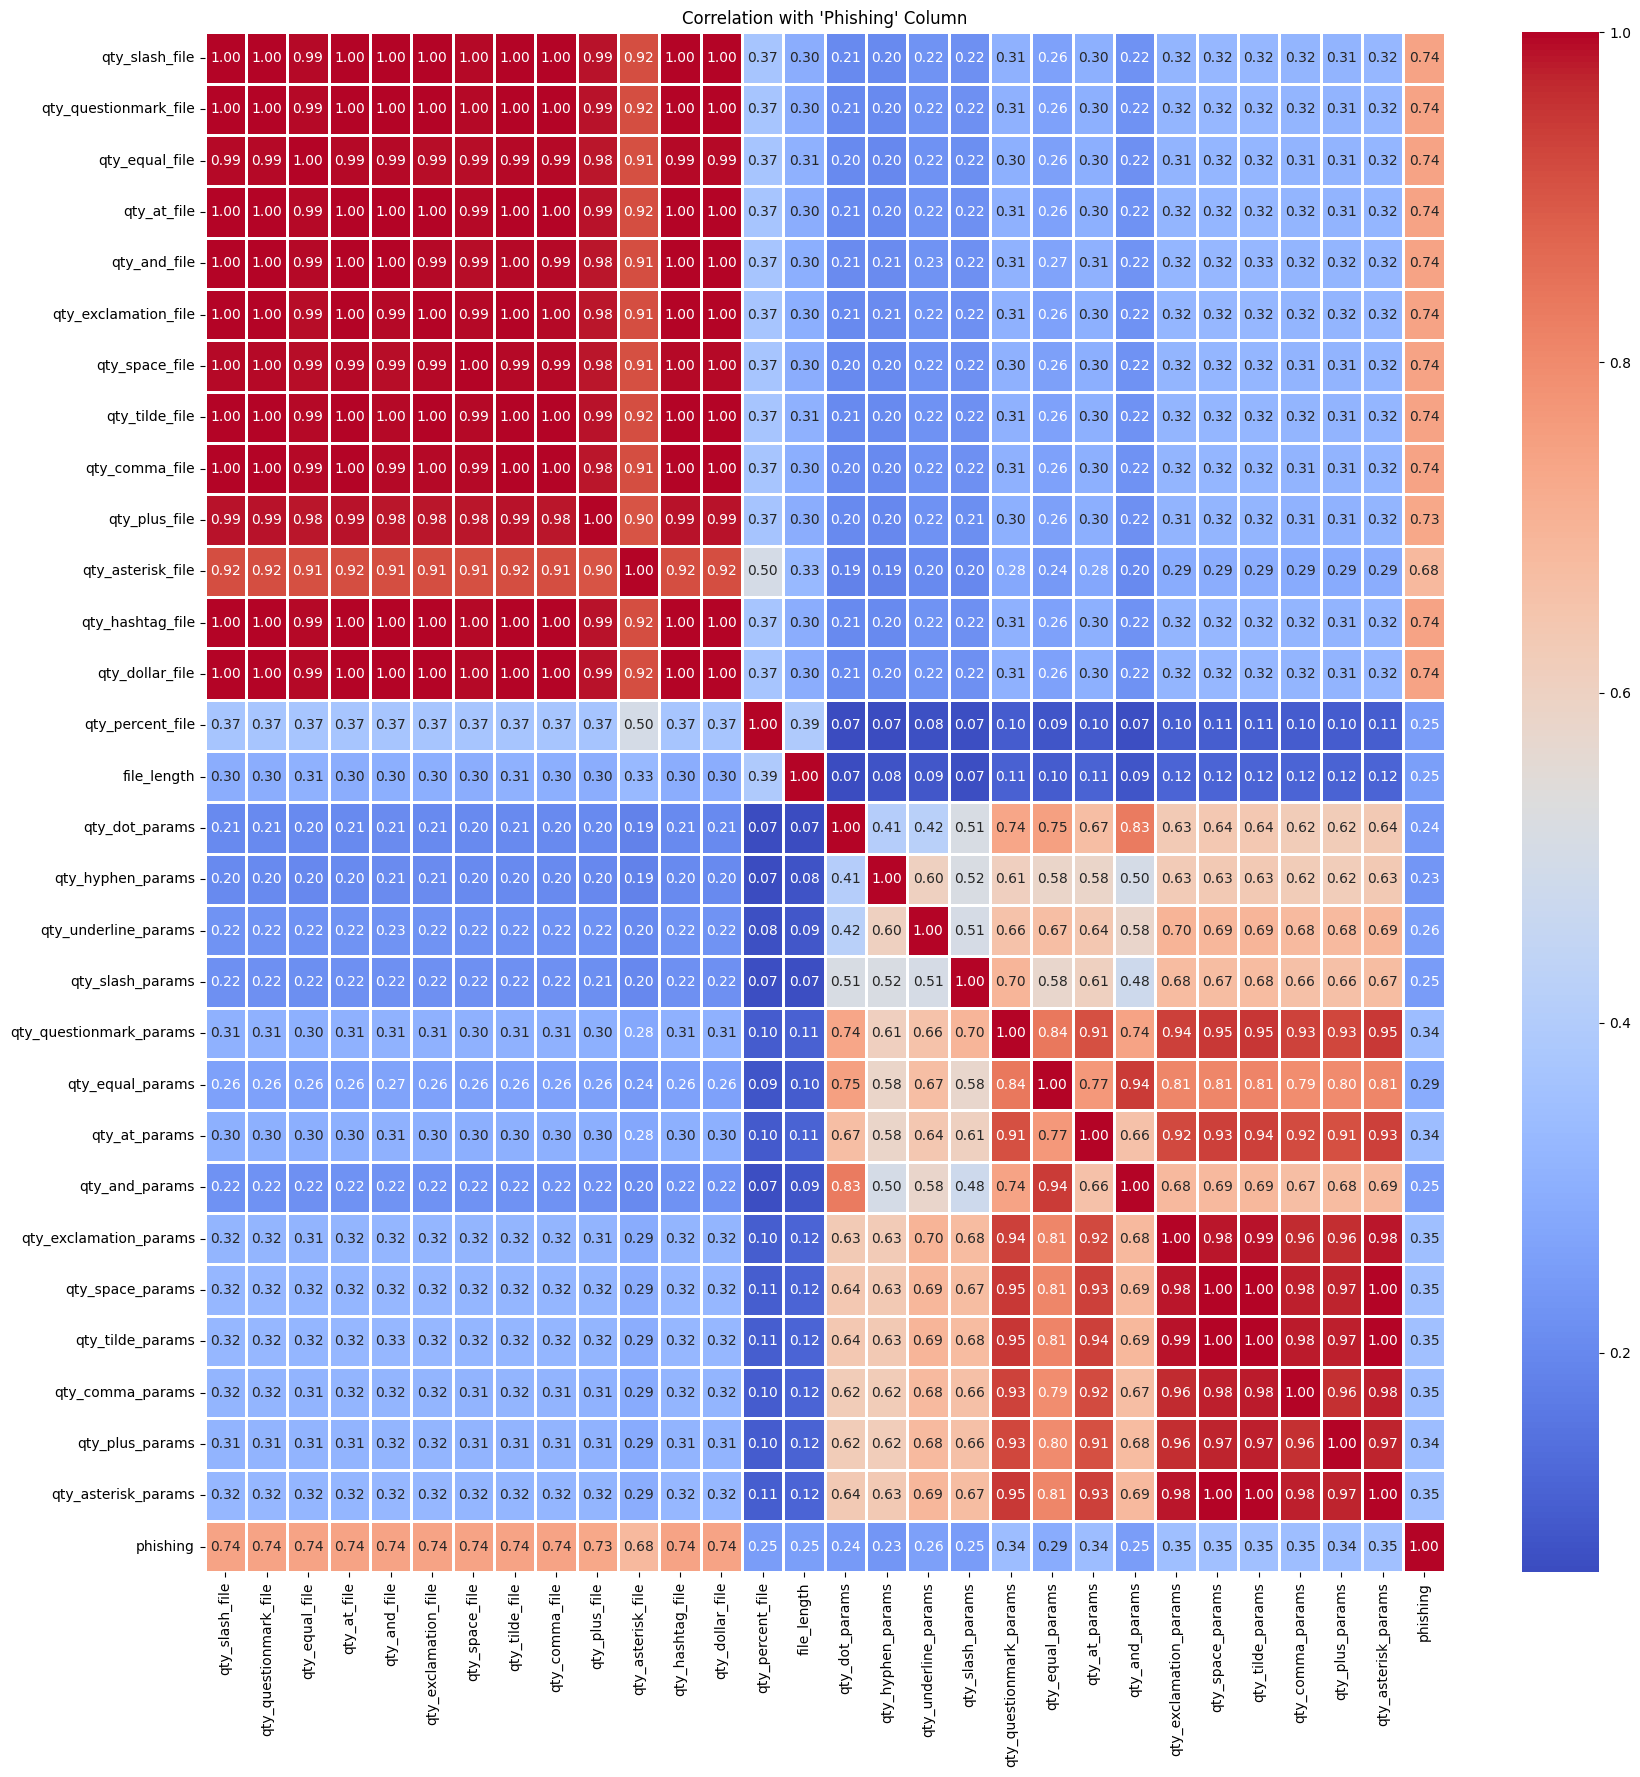

In [28]:
corr_matrix_cs(df_cs, 61, 90)

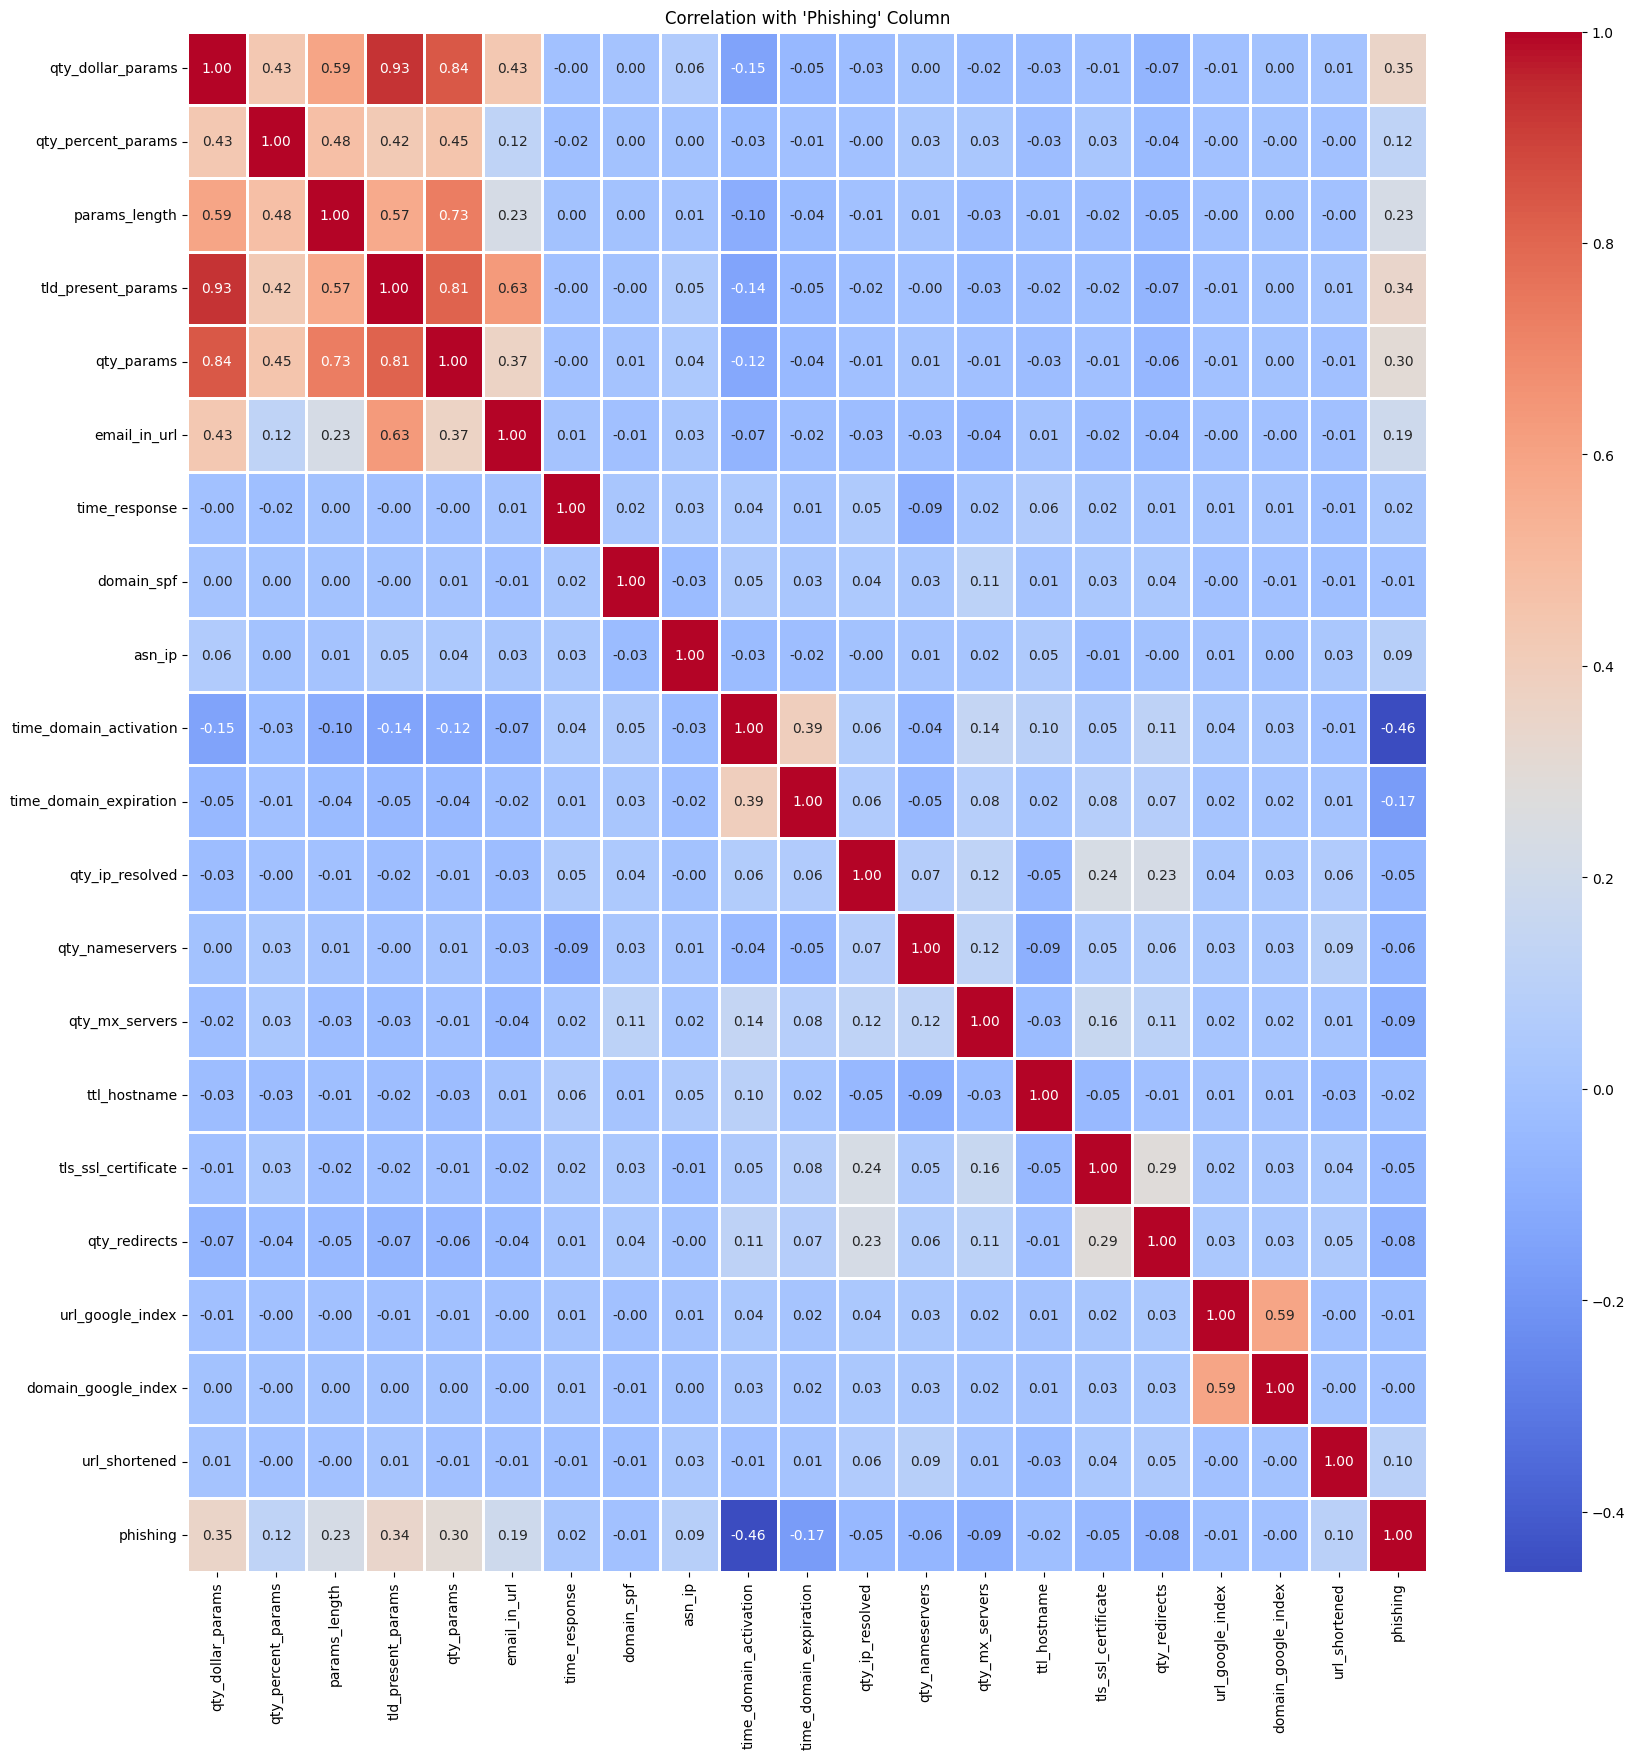

In [29]:
corr_matrix_cs(df_cs, 91, 112)

> #### **💡 Explanation:**  
> Based on the heatmap analysis, there are columns that may prove useful for training our models.
> 
> Positive Correlation:
> * NumDots: 0.29
> * PathLevel: 0.23
> * FrequentDomainNameMismatch: 0.46
> * PctNullSelfRedirectHyperlinks: 0.34
> * InsecureForms: 0.32
> * PctExtHyperlinks: 0.26
> * NumSensitiveWords: 0.26
> 
> Negative Correlation:
> * NumDash: -0.37  
> *  SubmitToEmail: -0.3
> * 
PctExtNullSelfRedirectHyperlinksRT: -0.
>
> #### **❓ Why Include Negative Correlations?**  
> Negative correlations can provide valuable insights as well. In the context of phishing detection, a negative correlation may indicate that certain features listed above are inversely related, which could help distinguish between phishing and legitimate links. Therefore, negative correlations should not be overlooked, as they can also serve as useful indicators for training ML models.54: 0.26

### 5.2 Phishing Dataset for Machine Learning

In [30]:
df_ml.describe()

id       NumDots  SubdomainLevel     PathLevel     UrlLength  \
count  10000.00000  10000.000000    10000.000000  10000.000000  10000.000000   
mean    5000.50000      2.445100        0.586800      3.300300     70.264100   
std     2886.89568      1.346836        0.751214      1.863241     33.369877   
min        1.00000      1.000000        0.000000      0.000000     12.000000   
25%     2500.75000      2.000000        0.000000      2.000000     48.000000   
50%     5000.50000      2.000000        1.000000      3.000000     62.000000   
75%     7500.25000      3.000000        1.000000      4.000000     84.000000   
max    10000.00000     21.000000       14.000000     18.000000    253.000000   

            NumDash  NumDashInHostname      AtSymbol   TildeSymbol  \
count  10000.000000       10000.000000  10000.000000  10000.000000   
mean       1.818000           0.138900      0.000300      0.013100   
std        3.106258           0.545744      0.017319      0.113709   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.000000           0.000000      0.000000      0.000000   
75%        2.000000           0.000000      0.000000      0.000000   
max       55.000000           9.000000      1.000000      1.000000   

       NumUnderscore  ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  \
count    10000.00000  ...   10000.000000   10000.00000      10000.000000   
mean         0.32320  ...       0.339600       0.03220          0.030400   
std          1.11466  ...       0.473597       0.17654          0.171694   
min          0.00000  ...       0.000000       0.00000          0.000000   
25%          0.00000  ...       0.000000       0.00000          0.000000   
50%          0.00000  ...       0.000000       0.00000          0.000000   
75%          0.00000  ...       1.000000       0.00000          0.000000   
max         18.00000  ...       1.000000       1.00000          1.000000   

       SubdomainLevelRT   UrlLengthRT  PctExtResourceUrlsRT  \
count      10000.000000  10000.000000          10000.000000   
mean           0.956600      0.020200              0.353300   
std            0.248037      0.820036              0.888908   
min           -1.000000     -1.000000             -1.000000   
25%            1.000000     -1.000000             -1.000000   
50%            1.000000      0.000000              1.000000   
75%            1.000000      1.000000              1.000000   
max            1.000000      1.000000              1.000000   

       AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
count            10000.000000         10000.000000   
mean                 0.793200             0.173400   
std                  0.521019             0.755771   
min                 -1.000000            -1.000000   
25%                  1.000000             0.000000   
50%                  1.000000             0.000000   
75%                  1.000000             1.000000   
max                  1.000000             1.000000   

       PctExtNullSelfRedirectHyperlinksRT   CLASS_LABEL  
count                        10000.000000  10000.000000  
mean                             0.314100      0.500000  
std                              0.897843      0.500025  
min                             -1.000000      0.000000  
25%                             -1.000000      0.000000  
50%                              1.000000      0.500000  
75%                              1.000000      1.000000  
max                              1.000000      1.000000  

[8 rows x 50 columns]

#### 5.2.1 Check for Balanced/Imbalanced Data

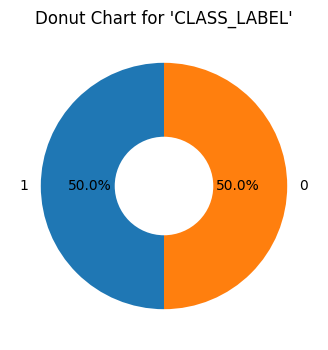

In [31]:
# Check for imbalanced labels
chart_ml = df_ml['CLASS_LABEL'].value_counts()

plt.figure(figsize=(4, 4))  # Adjust the size as needed
plt.pie(chart_ml, labels=chart_ml.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.6})
plt.title("Donut Chart for 'CLASS_LABEL'")

plt.show()

> #### **💡 Explanation:**  
> Based on the bar chart above, we can conclude that the dataset is balanced between the phishing and non-phising labels.

#### 5.2.2 Correlation Matrix

Correlation Matrix:
                                          id   NumDots  SubdomainLevel  \
id                                  1.000000 -0.238066        0.027976   
NumDots                            -0.238066  1.000000        0.507992   
SubdomainLevel                      0.027976  0.507992        1.000000   
PathLevel                          -0.234909  0.079202        0.007277   
UrlLength                          -0.046967  0.277380        0.098579   
NumDash                             0.231091 -0.198769       -0.050018   
NumDashInHostname                  -0.107170  0.093034        0.246368   
AtSymbol                            0.009916  0.011425       -0.005845   
TildeSymbol                        -0.084148  0.109508        0.009518   
NumUnderscore                       0.024811  0.038068       -0.023593   
NumPercent                          0.042614  0.022616       -0.006003   
NumQueryComponents                  0.047733  0.169283       -0.029706   
NumAmpersand      

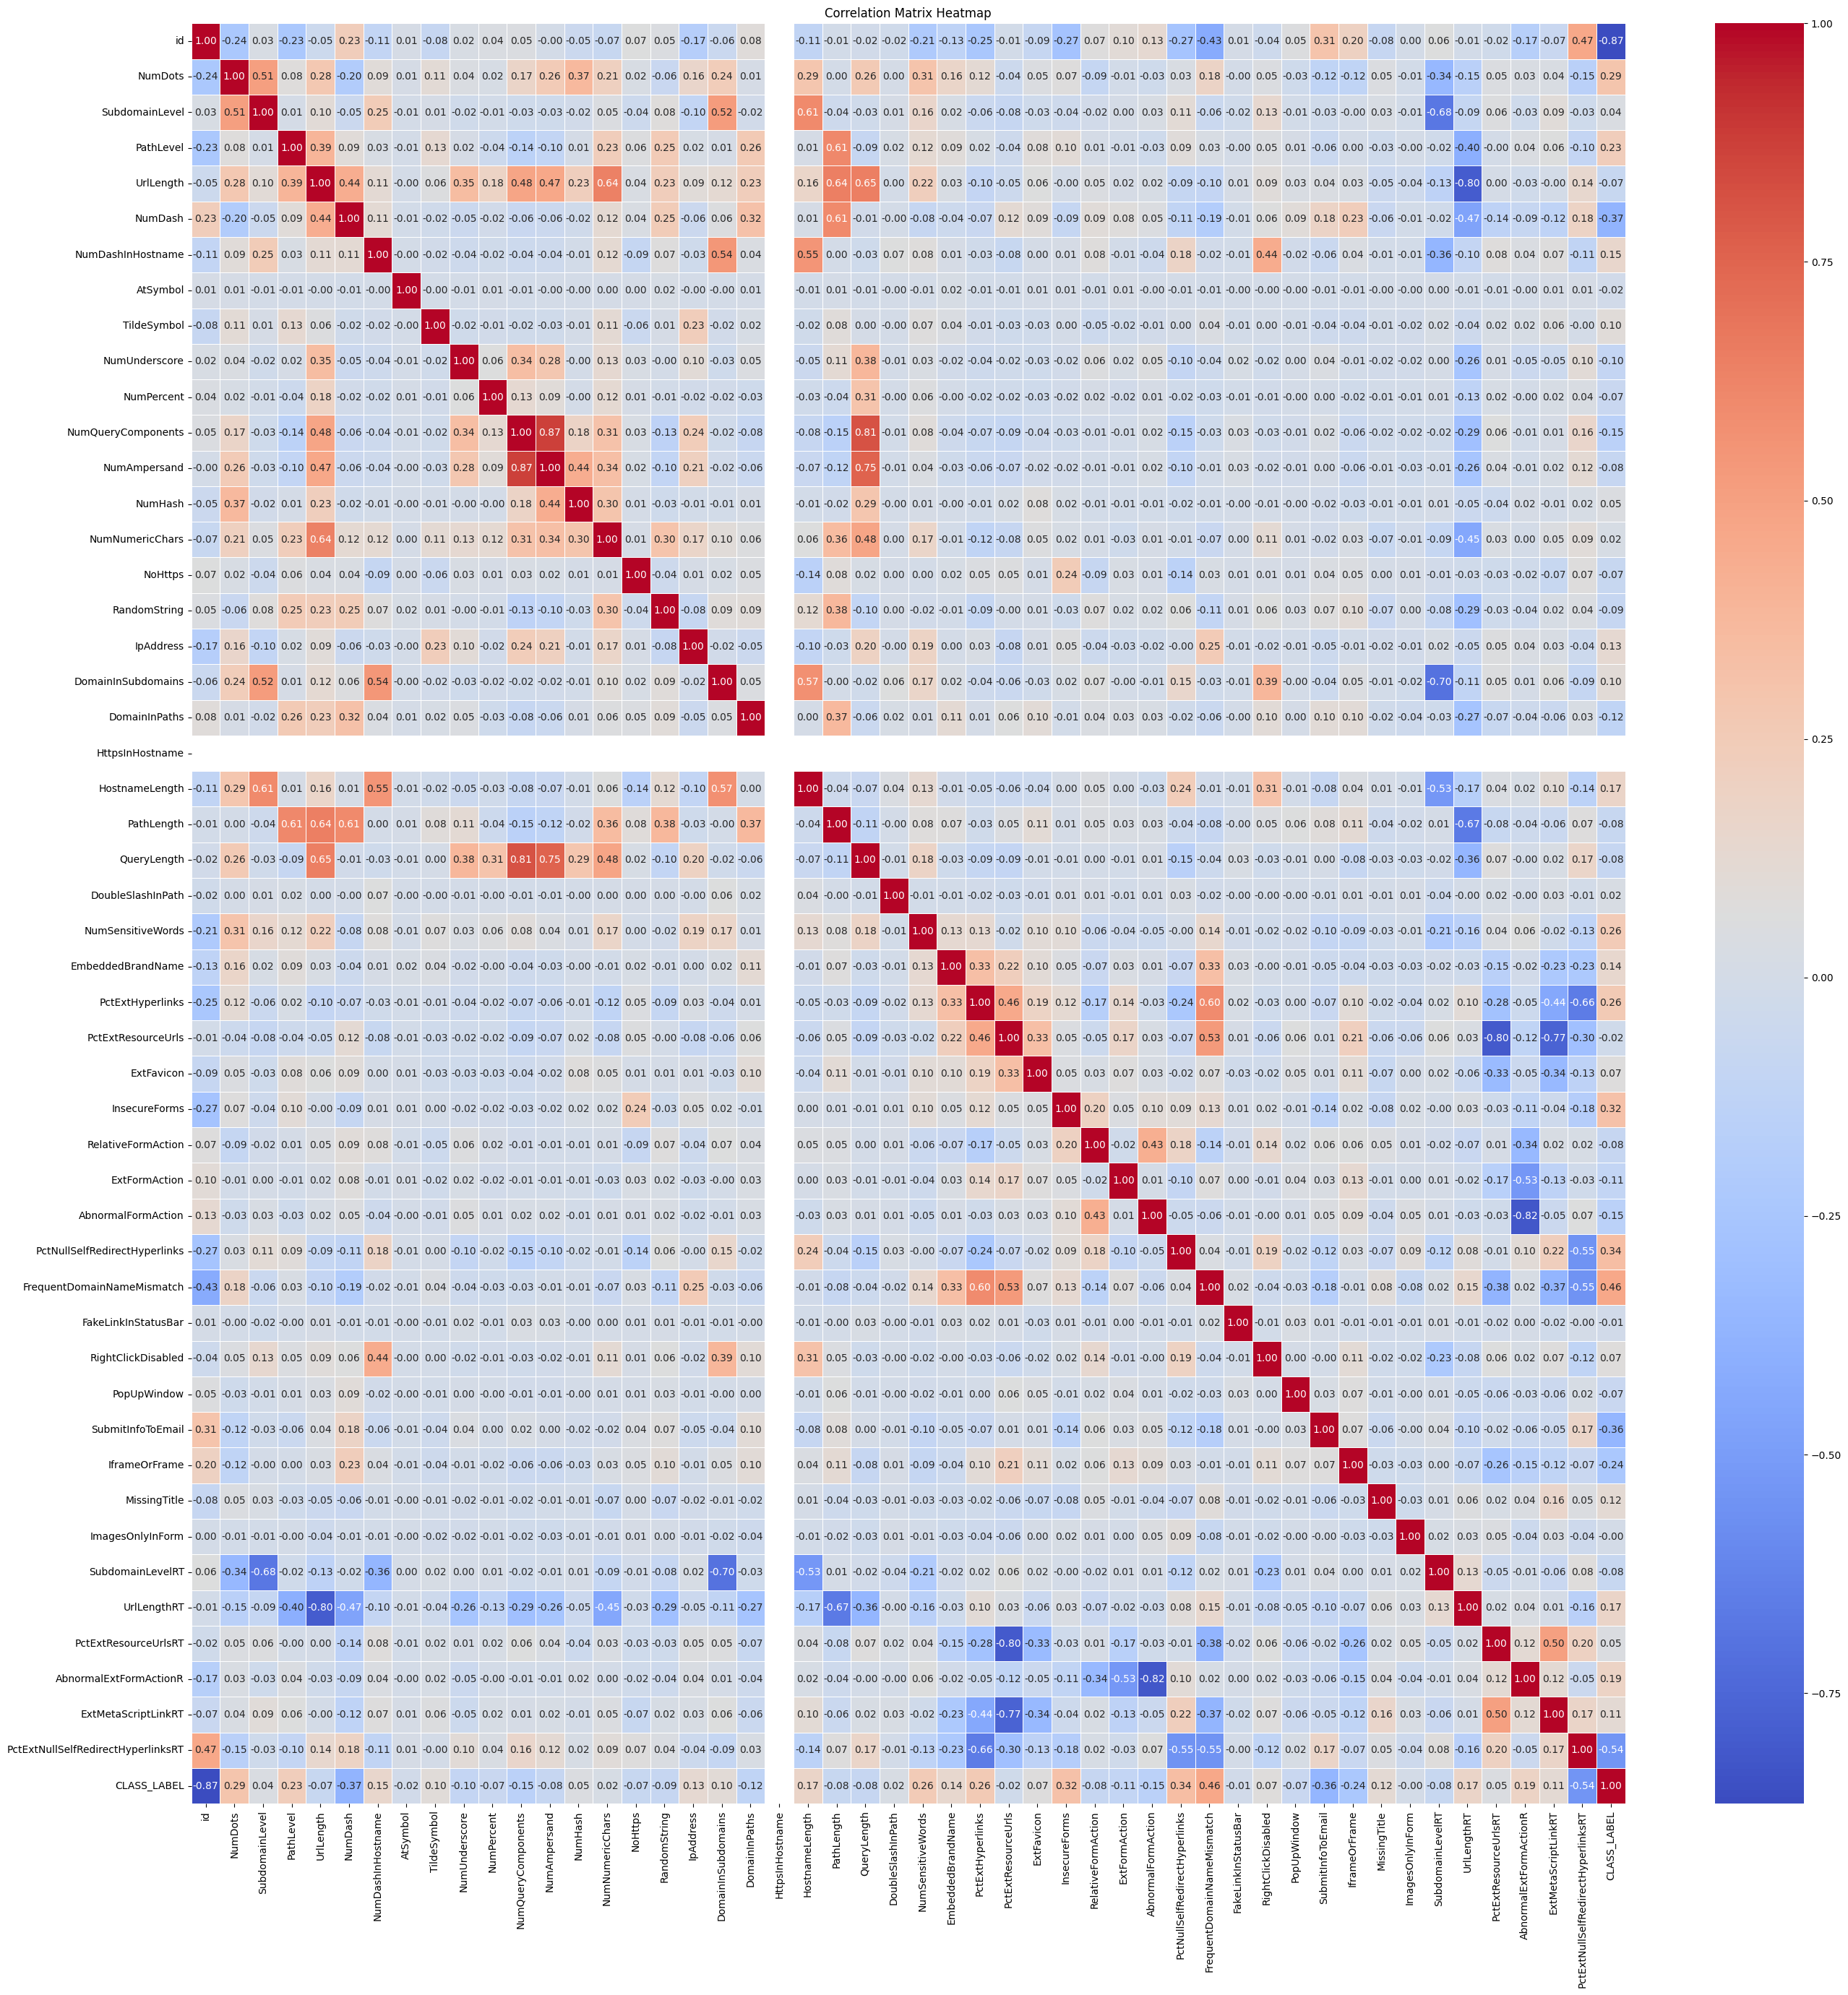

In [32]:
corr_matrix_ml = df_ml.corr()
print("Correlation Matrix:")
print(corr_matrix_ml)

# Visualize Correlation Matrix using Heatmap
plt.figure(figsize=(32, 32))
sns.heatmap(corr_matrix_ml, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

> #### **💡 Explanation:**  
> Based on the heatmap analysis, there are columns that may prove useful for training our models.
> 
> Positive Correlation:
> * NumDots: 0.29
> * PathLevel: 0.23
> * FrequentDomainNameMismatch: 0.46
> * PctNullSelfRedirectHyperlinks: 0.34
> * InsecureForms: 0.32
> * PctExtHyperlinks: 0.26
> * NumSensitiveWords: 0.26
> 
> Negative Correlation:
> * NumDash: -0.37  
> *  SubmitToEmail: -0.3
> * 
PctExtNullSelfRedirectHyperlinksRT: -0.
>
> #### **❓ Why Include Negative Correlations?**  
> Negative correlations can provide valuable insights as well. In the context of phishing detection, a negative correlation may indicate that certain features listed above are inversely related, which could help distinguish between phishing and legitimate links. Therefore, negative correlations should not be overlooked, as they can also serve as useful indicators for training ML models.54: 0.26

### 5.3 Web Page Phishing Detection Dataset

In [33]:
df_web.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

#### 5.3.1 Check for Balanced/Imbalanced Data

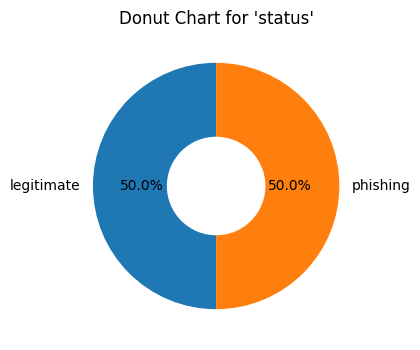

In [34]:
# Check for imbalanced labels
chart_web = df_web['status'].value_counts()

plt.figure(figsize=(4, 4))  # Adjust the size as needed
plt.pie(chart_web, labels=chart_web.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.6})
plt.title("Donut Chart for 'status'")

plt.show()

> #### **💡 Explanation:**  
> Based on the bar chart above, we can conclude that the dataset is balanced between the phishing and non-phising labels.

#### 5.3.2 Correlation Matrix

In [35]:
# Convert 'Status' column into numeric (legitimate = 0 ; phishing = 1)
df_web['status'] = df_web['status'].replace({'legitimate': 0, 'phishing': 1})

# Convert the data type to int
df_web['status'] = df_web['status'].astype(int)

# Verify the conversion
print(df_web['status'].head())

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64


C:\Users\Lycia\AppData\Local\Temp\ipykernel_3248\369369121.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_web['status'] = df_web['status'].replace({'legitimate': 0, 'phishing': 1})


> #### **💡 Explanation:**  
> This conversion is useful so that the 'status' column can be visualized in the heatmap to find the correlation with other columns.
>
> #### **❓ Why?**
> Because the 'Status' column is not numeric, which means that the heatmap won't be able to visualize it in the heatmap. So this step is beneficial to display the correlation matrix.

In [36]:
def corr_matrix_web(data, idx_s, idx_e):
    # Extract the 'status' column
    y = data['status']
    
    # Subset the data from idx_s to idx_e and add 'status' column
    temp = data.iloc[:, idx_s:idx_e]
    temp['status'] = y  # Add the 'status' column to the subset
    
    # Remove non-numeric columns (if any) before calculating correlation
    temp = temp.select_dtypes(include=['number'])
    plt.figure(figsize=(20, 20)) 
    
    # Generate heatmap of correlation between the 10 columns and 'status'
    sns.heatmap(temp.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
    plt.title("Correlation with 'Status' Column")
    plt.show()

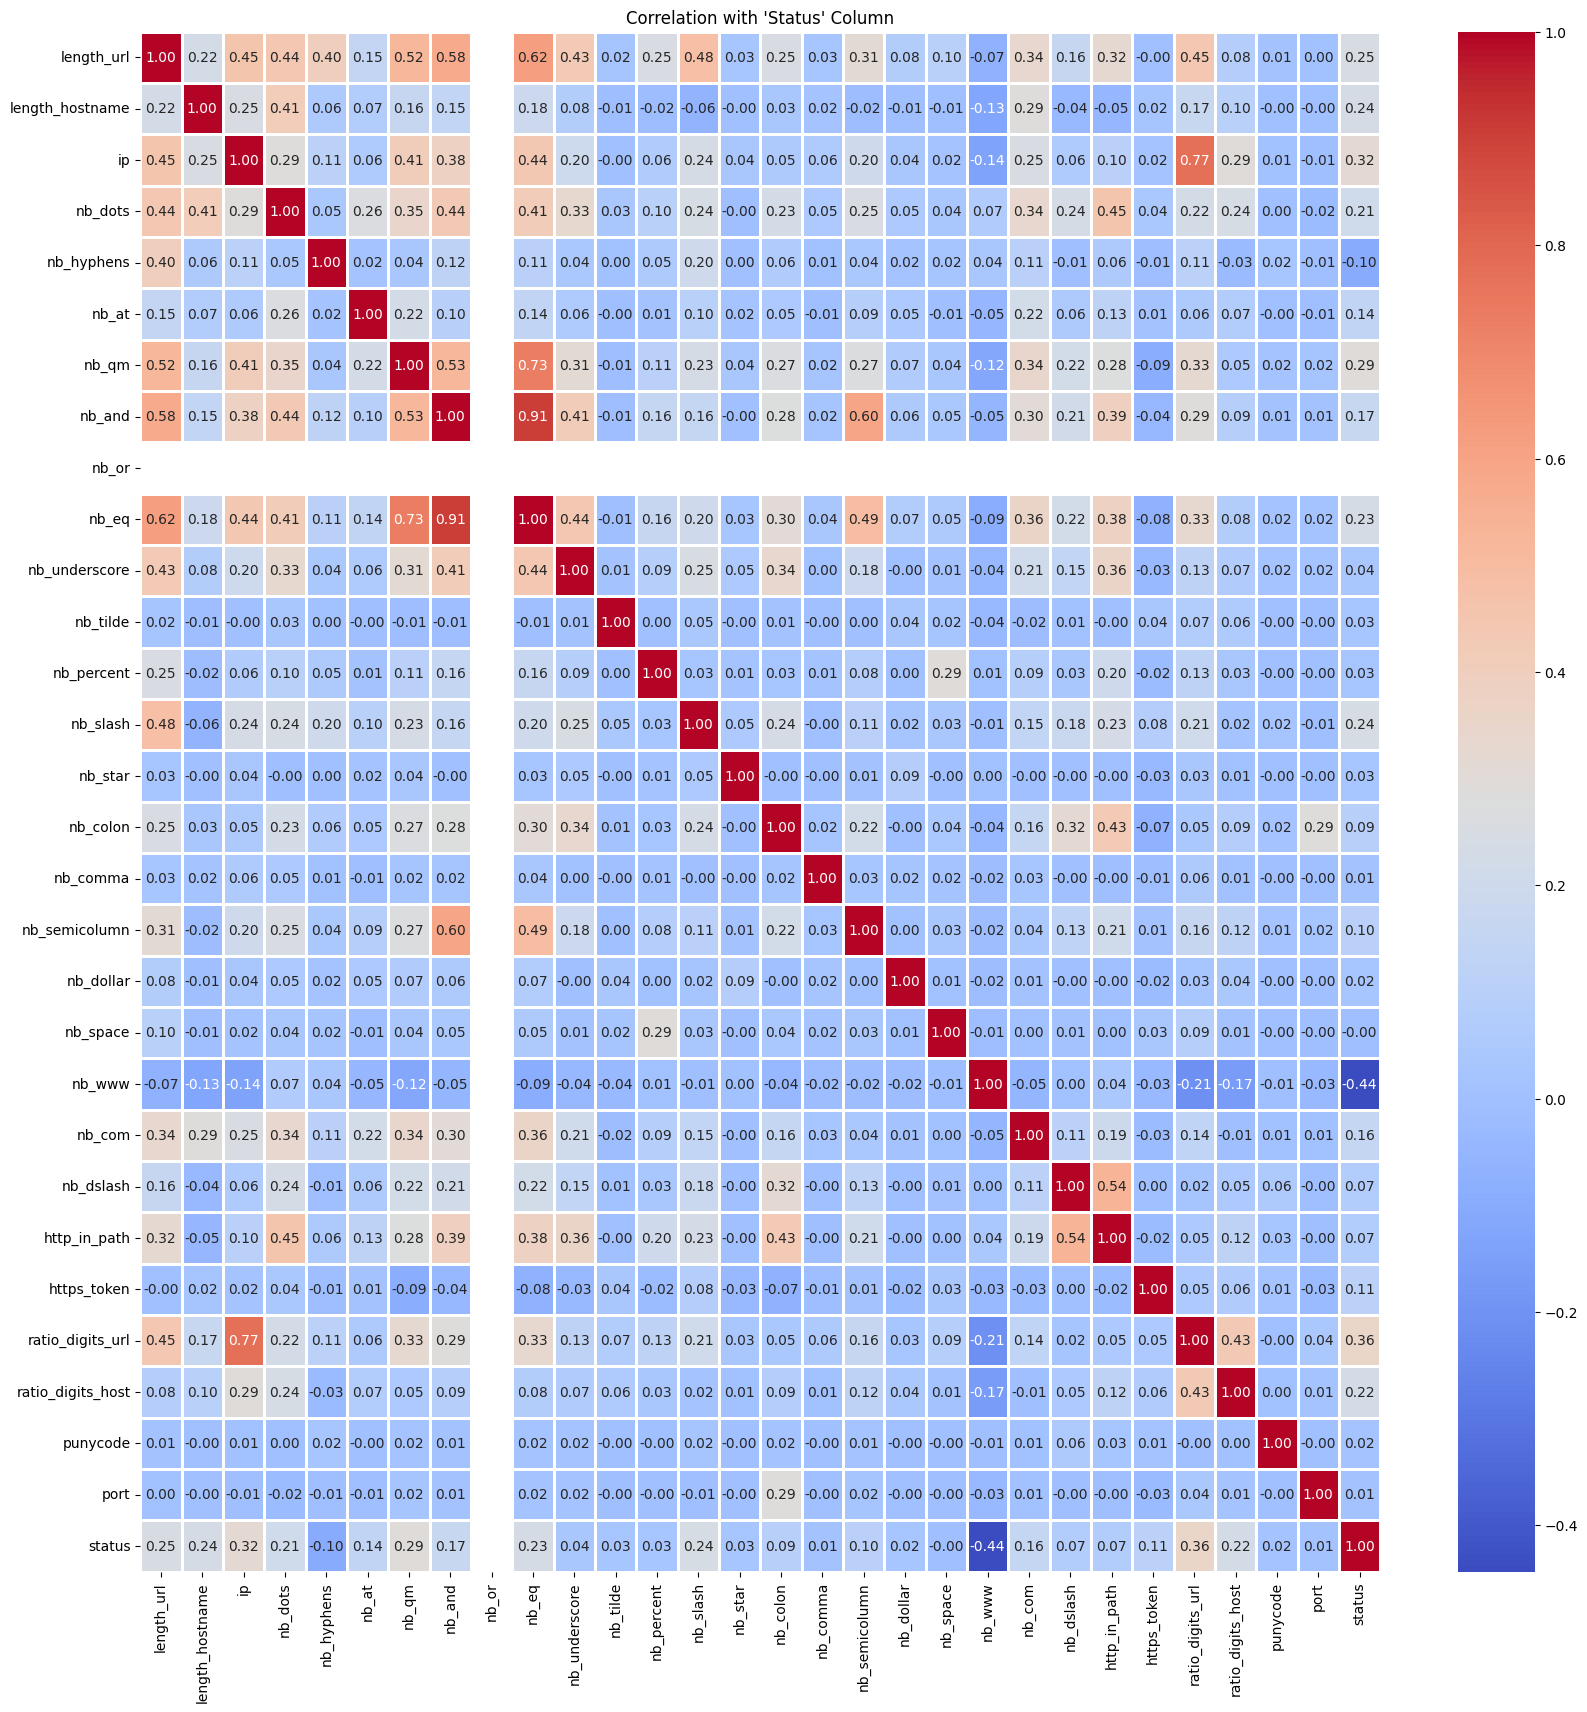

In [37]:
corr_matrix_web(df_web, 0, 30)

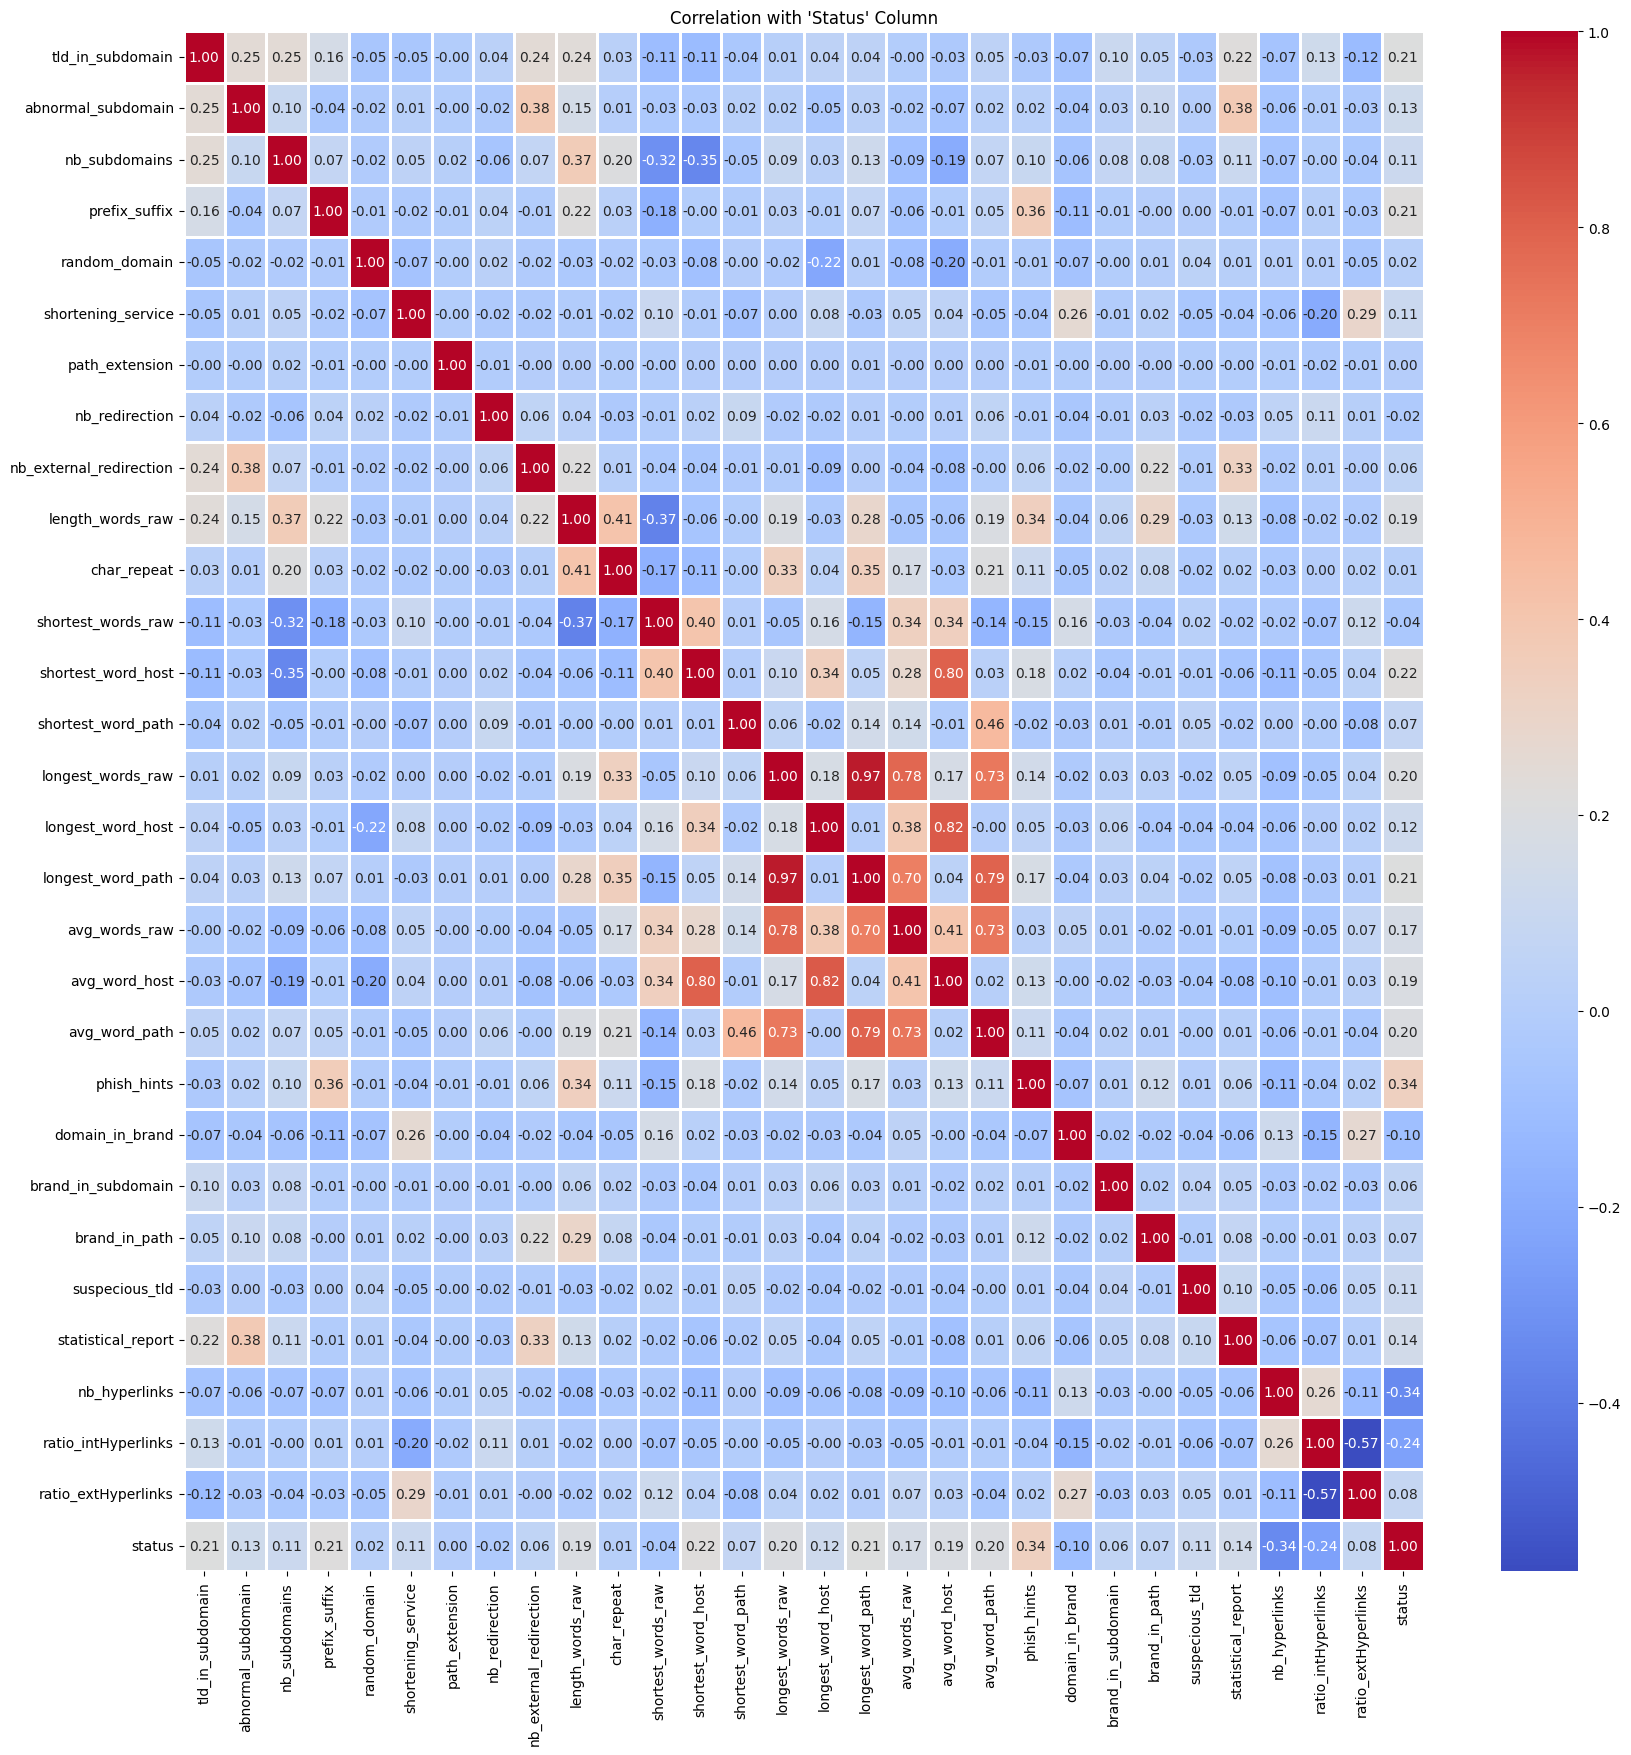

In [38]:
corr_matrix_web(df_web, 31, 60)

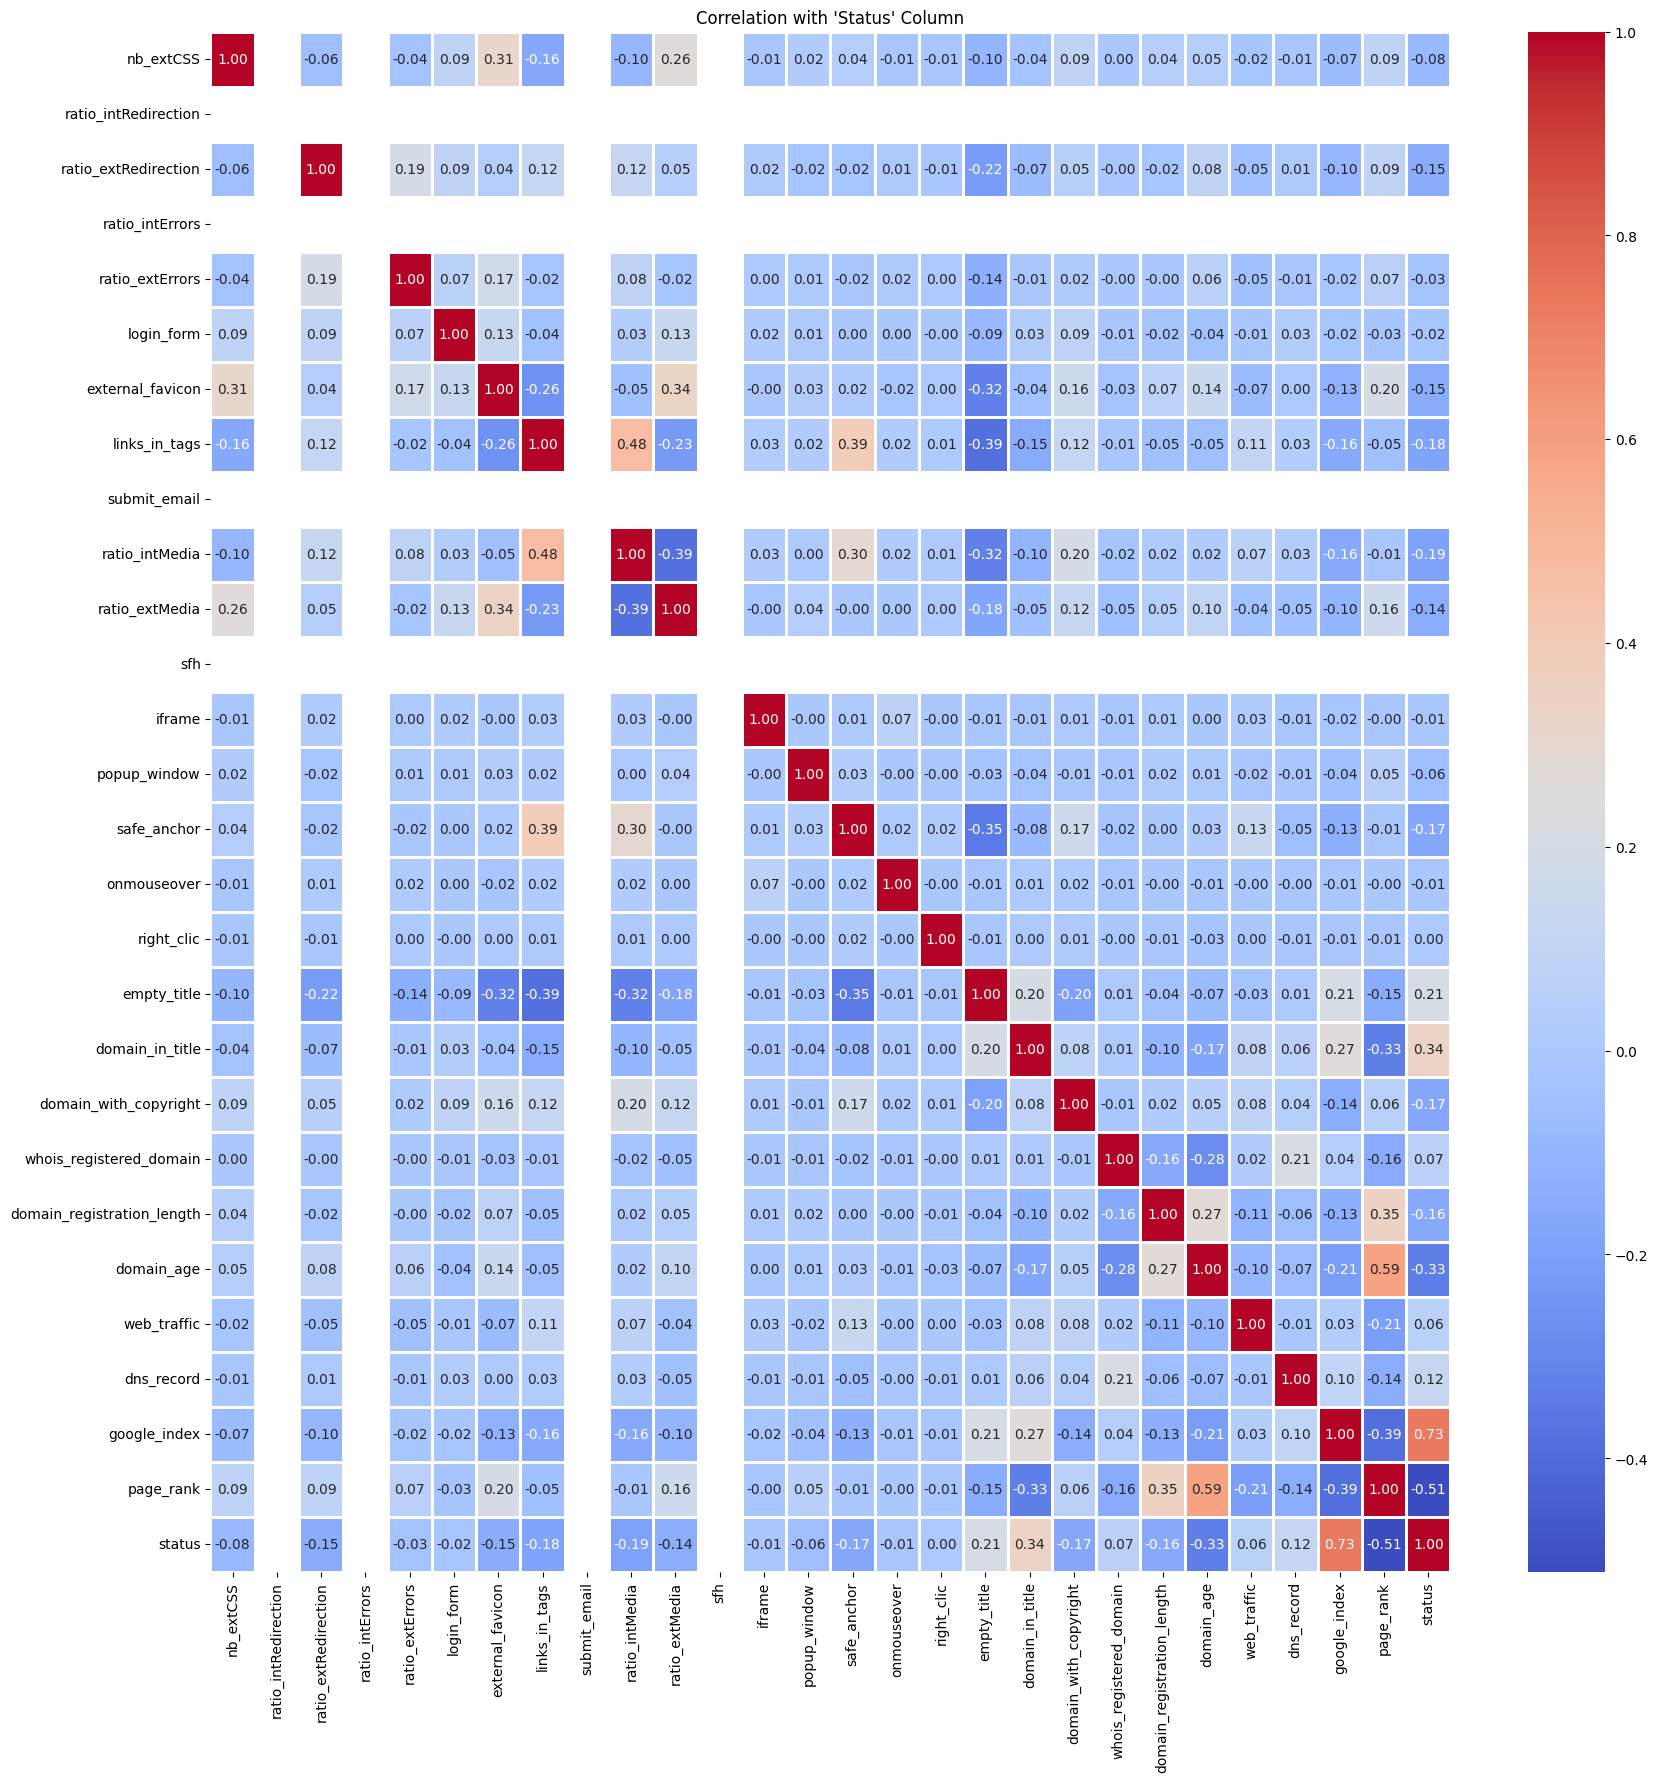

In [39]:
corr_matrix_web(df_web, 61, 90)

## 6. Train the Machine Learning Model
### 6.1 SVM (Support Vector Machine)

In [ ]:
svm_model = SVC(class_weight=cs_class_weights_dict, kernel='linear', random_state=42)

svm_model.fit(cs_X_train, cs_y_train)

# Evaluate the model
svm_accuracy = svm_model.score(cs_X_test, cs_y_test)
print(f"Accuracy on the test set: {svm_accuracy:.4f}")